# Modelli per serie con stagionalità multiple

Le serie temporali ad elevata frequenza presentano spesso delle stagionalità complesse. Ad esempio, i dati con frequenza giornaliera possono avere stagionalità settimanale ed annuale; mentre i dati con frequenza oraria hanno di solito stagionalità giornaliera, settimanale ed annuale. Anche i dati con frequenza settimanale possono essere difficili da trattare in quanto hanno in genere una stagionalità annuale pari a circa $52.179$, ovvero $365.25 / 7$.

Tuttavia, la maggior parte dei modelli che abbiamo esaminato finora non è in grado di affrontare queste stagionalità complesse. Ad esempio, il modello SARIMAX può gestire un solo tipo di stagionalità e, in genere, si presuppone che questa assuma valori interi.

Per questi motivi, i modelli per serie con stagionalità multiple stanno diventando sempre più comuni nell'analisi dei dati ad alta frequenza. Tali modelli devono quindi essere in grado di gestire più tipi di stagionalità contemporaneamente, consentendo di specificare tutti quelli che potrebbero essere rilevanti. Infatti, non si vuole necessariamente includere tutti i tipi di stagionalità, ma solo quelli che si pensa possano essere presenti nei dati a seguito delle analisi di stagionalità. Infine, i modelli devono essere anche abbastanza flessibili nel gestire i valori di stagionalità non interi.

## Modello TBATS

TBATS è un modello alternativo sviluppato da De Livera, Hyndman e Snyder (2011) che incorpora trasformazioni Box-Cox, serie di Fourier con coefficienti variabili nel tempo e correzione degli errori tramite modello ARMA. TBATS è stato introdotto per consentire la previsione di serie temporali con stagionalità complesse (ad es. stagionalità multiple, stagionalità ad alta frequenza, stagionalità non intere), le quali non possono essere gestite utilizzando i modelli di previsione esistenti.

Essendo un framework di modellazione automatizzato, ci possono essere casi in cui TBATS fornisce risultati scarsi; ma, di contro, può comunque essere un approccio molto utile in alcune circostanze.

### Vantaggi e svantaggi

La serie di Fourier, ovvero una serie di termini seno e coseno con una determinata frequenza, può approssimare qualsiasi funzione periodica. Tale approccio è detto regressione armonica dinamica. Si possono quindi usare i termini della serie di Fourier anche per modellare la stagionalità; nel caso di stagionalità multiple sarà necessario aggiungere termini di Fourier per ogni periodo stagionale.

Un vantaggio dei modelli TBATS è che la stagionalità può cambiare lentamente nel tempo, a differenza della regressione armonica dinamica in cui i relativi termini costringono le stagionalità a ripetersi periodicamente senza cambiare. Uno svantaggio dei modelli TBATS, tuttavia, è che possono essere lenti da stimare, soprattutto con serie temporali lunghe.

### Implementazione

Il nome del modello è un acronimo delle sue funzionalità chiave, ovvero:
- Trigonometric seasonality.
- Box-Cox transformation.
- ARMA errors.
- Trend and Seasonal components.

Il modello TBATS affonda le sue radici nei metodi di exponential smoothing. La sua implementazione prevede che ogni stagionalità sia modellata da una rappresentazione trigonometrica basata sulla serie di Fourier. Uno dei principali vantaggi di questo approccio è la capacità di modellare periodi stagionali aventi lunghezze non intere. Ad esempio, data una serie di osservazioni giornaliere, è possibile modellare gli anni bisestili usando un periodo stagionale di lunghezza pari a $365.25$.

TBATS sceglie il modello finale prendendo in considerazione varie alternative. In particolare, TBATS prende in considerazione i modelli:
- Con e senza trasformazione Box-Cox.
- Con e senza Trend.
- Con e senza processo ARMA (utilizzato per modellare i residui).
- Con varie quantità di termini di Fourier (utilizzati per modellare i vari periodi stagionali).

Il modello finale verrà poi scelto utilizzando il criterio d'informazione di Akaike (AIC).

## Dati di un negozio di abbigliamento

### Analisi di stazionarietà e stagionalità

Una volta caricati i dati giornalieri di vendita di un negozio di abbigliamento per alcune categorie di vestito, è stato possibile analizzare i grafici delle varie serie temporali.

In [2]:
import datetime as dt
import pandas as pd
import matplotlib.pyplot as plt

# imposto i parametri comuni a tutti i grafici
SMALL_SIZE = 28
MEDIUM_SIZE = 30
BIGGER_SIZE = 32
plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

# preparo un indice di tipo datetime
dateparse = lambda dates: dt.datetime.strptime(dates, '%Y-%m-%d')

# leggo le serie temporali nel file csv (MAGLIE, CAMICIE, GONNE, PANTALONI, VESTITI, GIACCHE)
data = pd.read_csv('./Whole period.csv', index_col=0, date_parser=dateparse)

# analizzo la serie temporale delle MAGLIE (per le altre il procedimento sarà analogo)
ts = data['MAGLIE']

# creo il grafico della serie temporale ts
plt.figure(figsize=(40, 20), dpi=80)
plt.title(ts.name)
plt.plot(ts, color='black')
plt.show()

FileNotFoundError: [Errno 2] File ./Whole period.csv does not exist: './Whole period.csv'

L'analisi di stazionarietà è stata fatta eseguendo il test Dickey-Fuller, a seguito del quale si può notare che il valore Test Statistic è minore dell'1% dei valori critici. Si può quindi dire con il 99% di confidenza che la serie temporale è stazionaria.

L'analisi di stagionalità, invece, è stata fatta prima guardando il grafico della componente stagionale dei dati (che si ricava dalla decomposizione), in cui si può notare chiaramente una componente stagionale annuale.

Poi è stata fatta un'analisi più approfondita della stagionalità guardando i grafici di autocorrelazione e autocorrelazione parziale, nei quali si possono osservare una componente stagionale settimanale e una componente stagionale semestrale. Sono infatti presenti dei picchi in corrispondenza dei multipli di 7 e in corrispondenza del valore 183.

Results of Dickey-Fuller Test for MAGLIE 

Test Statistic                -6.067962e+00
p-value                        1.169371e-07
#Lags Used                     2.200000e+01
Number of Observations Used    2.359000e+03
Critical Value (1%)           -3.433125e+00
Critical Value (5%)           -2.862766e+00
Critical Value (10%)          -2.567423e+00
dtype: float64


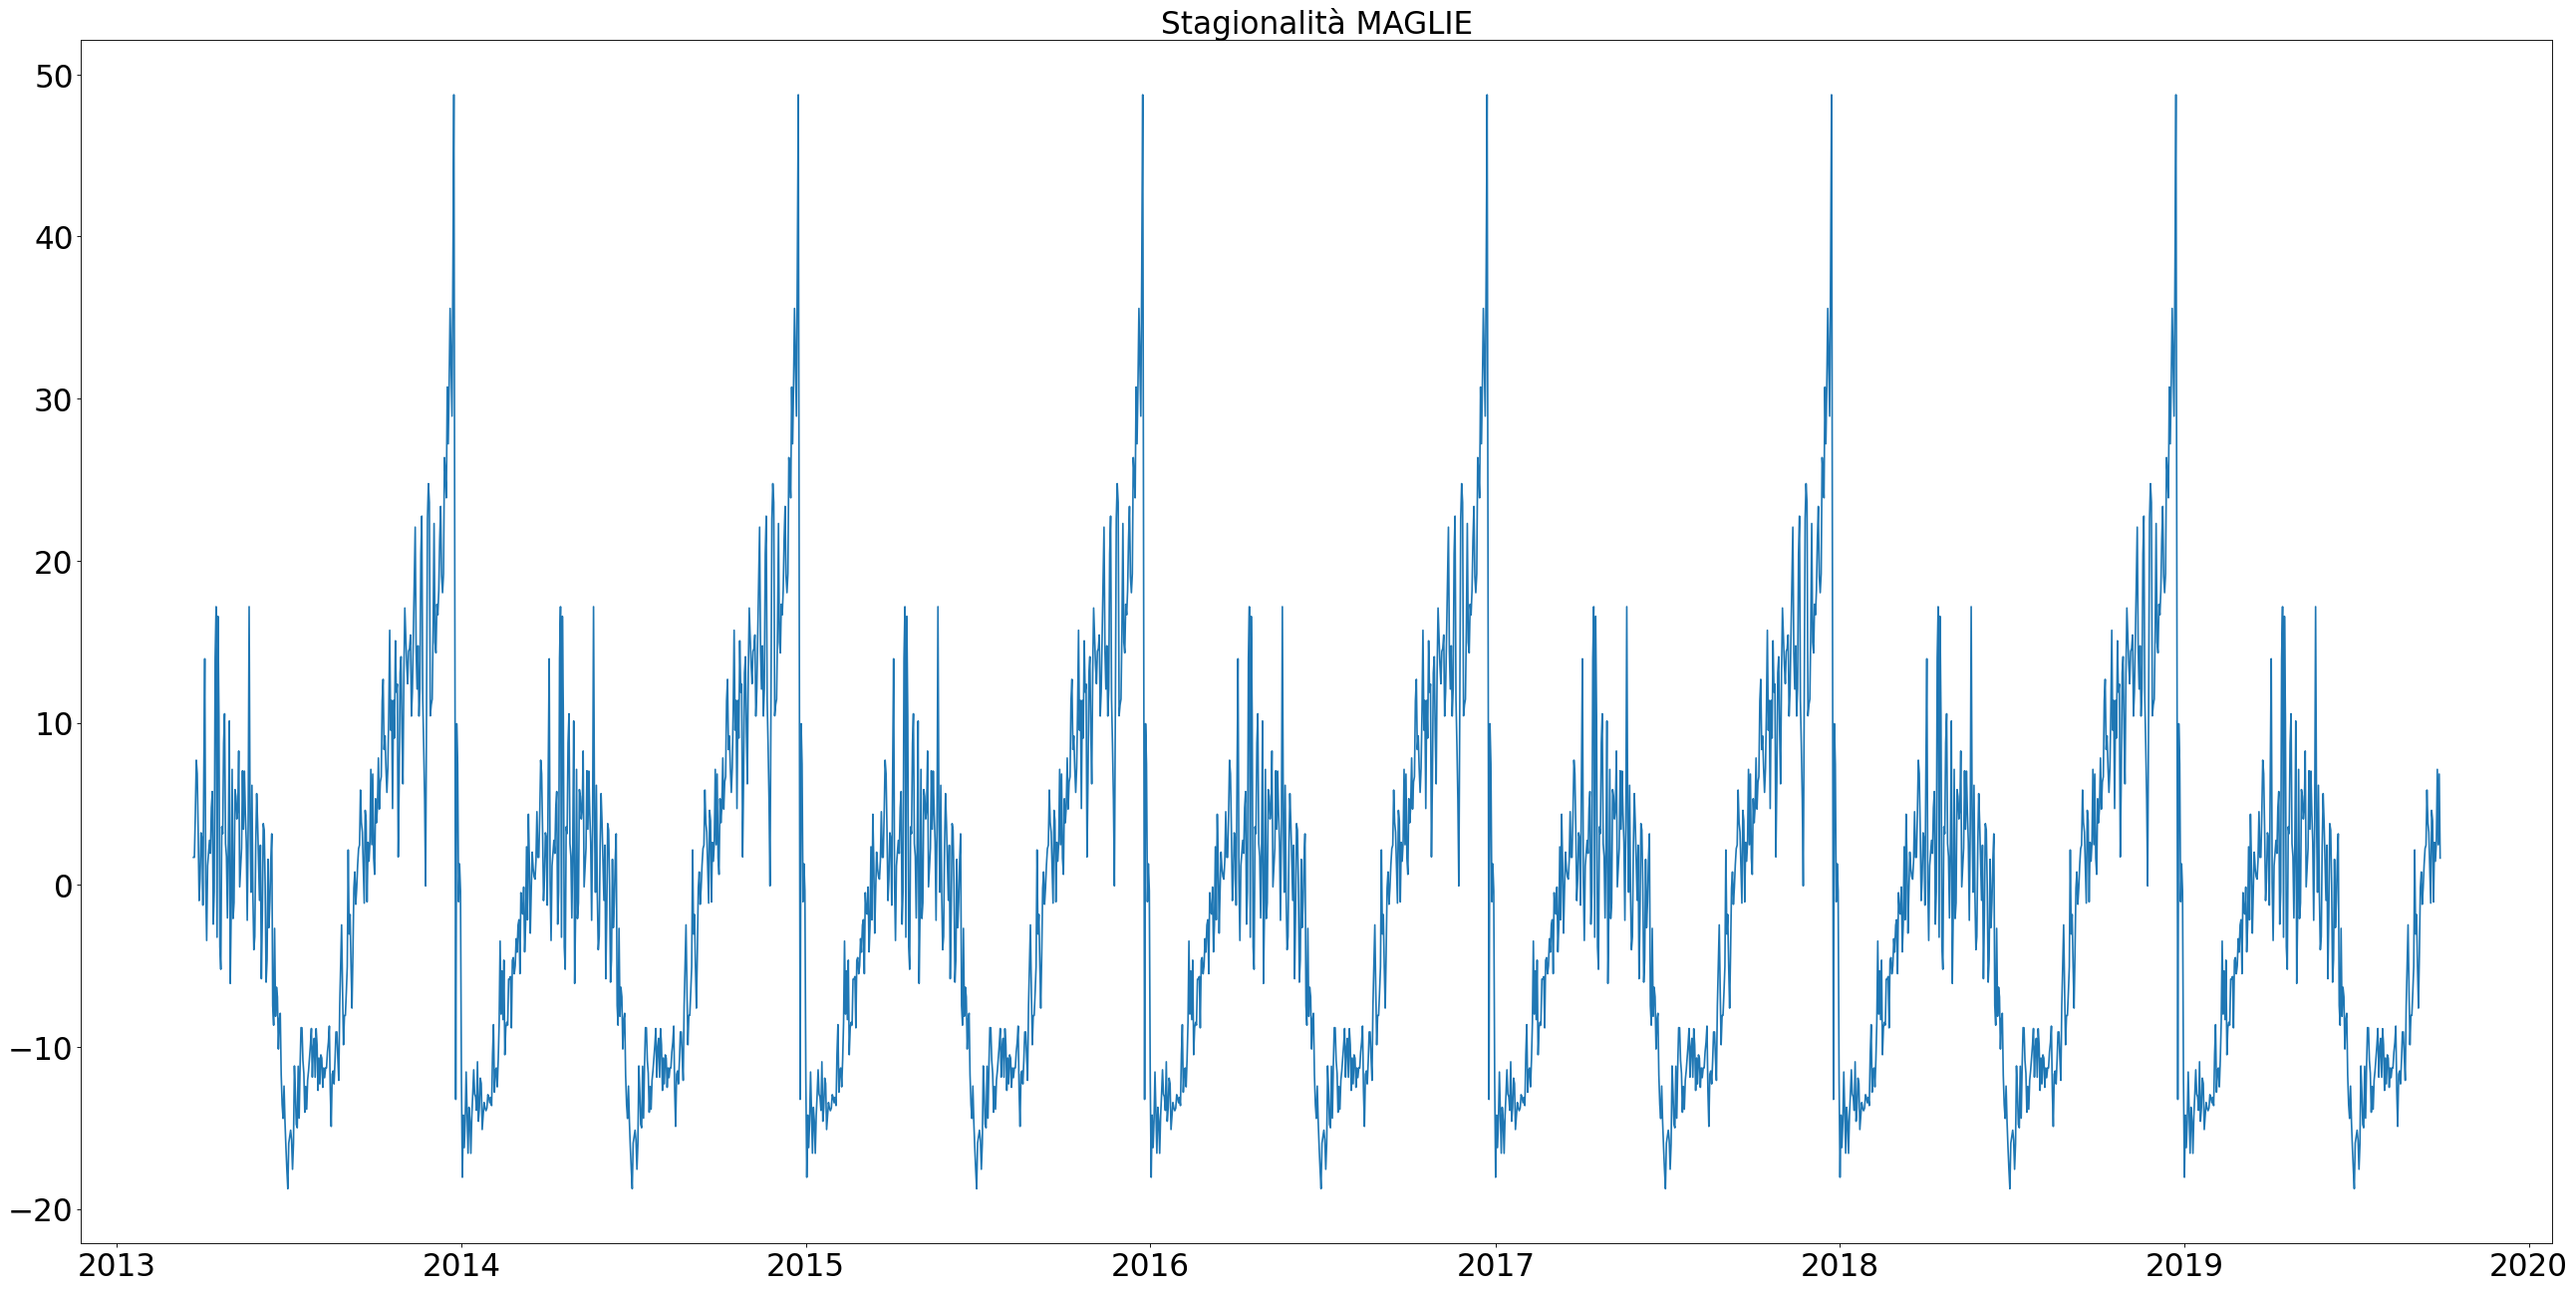

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:572: FutureWarning: fft=True will become the default in a future version of statsmodels. To suppress this warning, explicitly set fft=False.
  FutureWarning


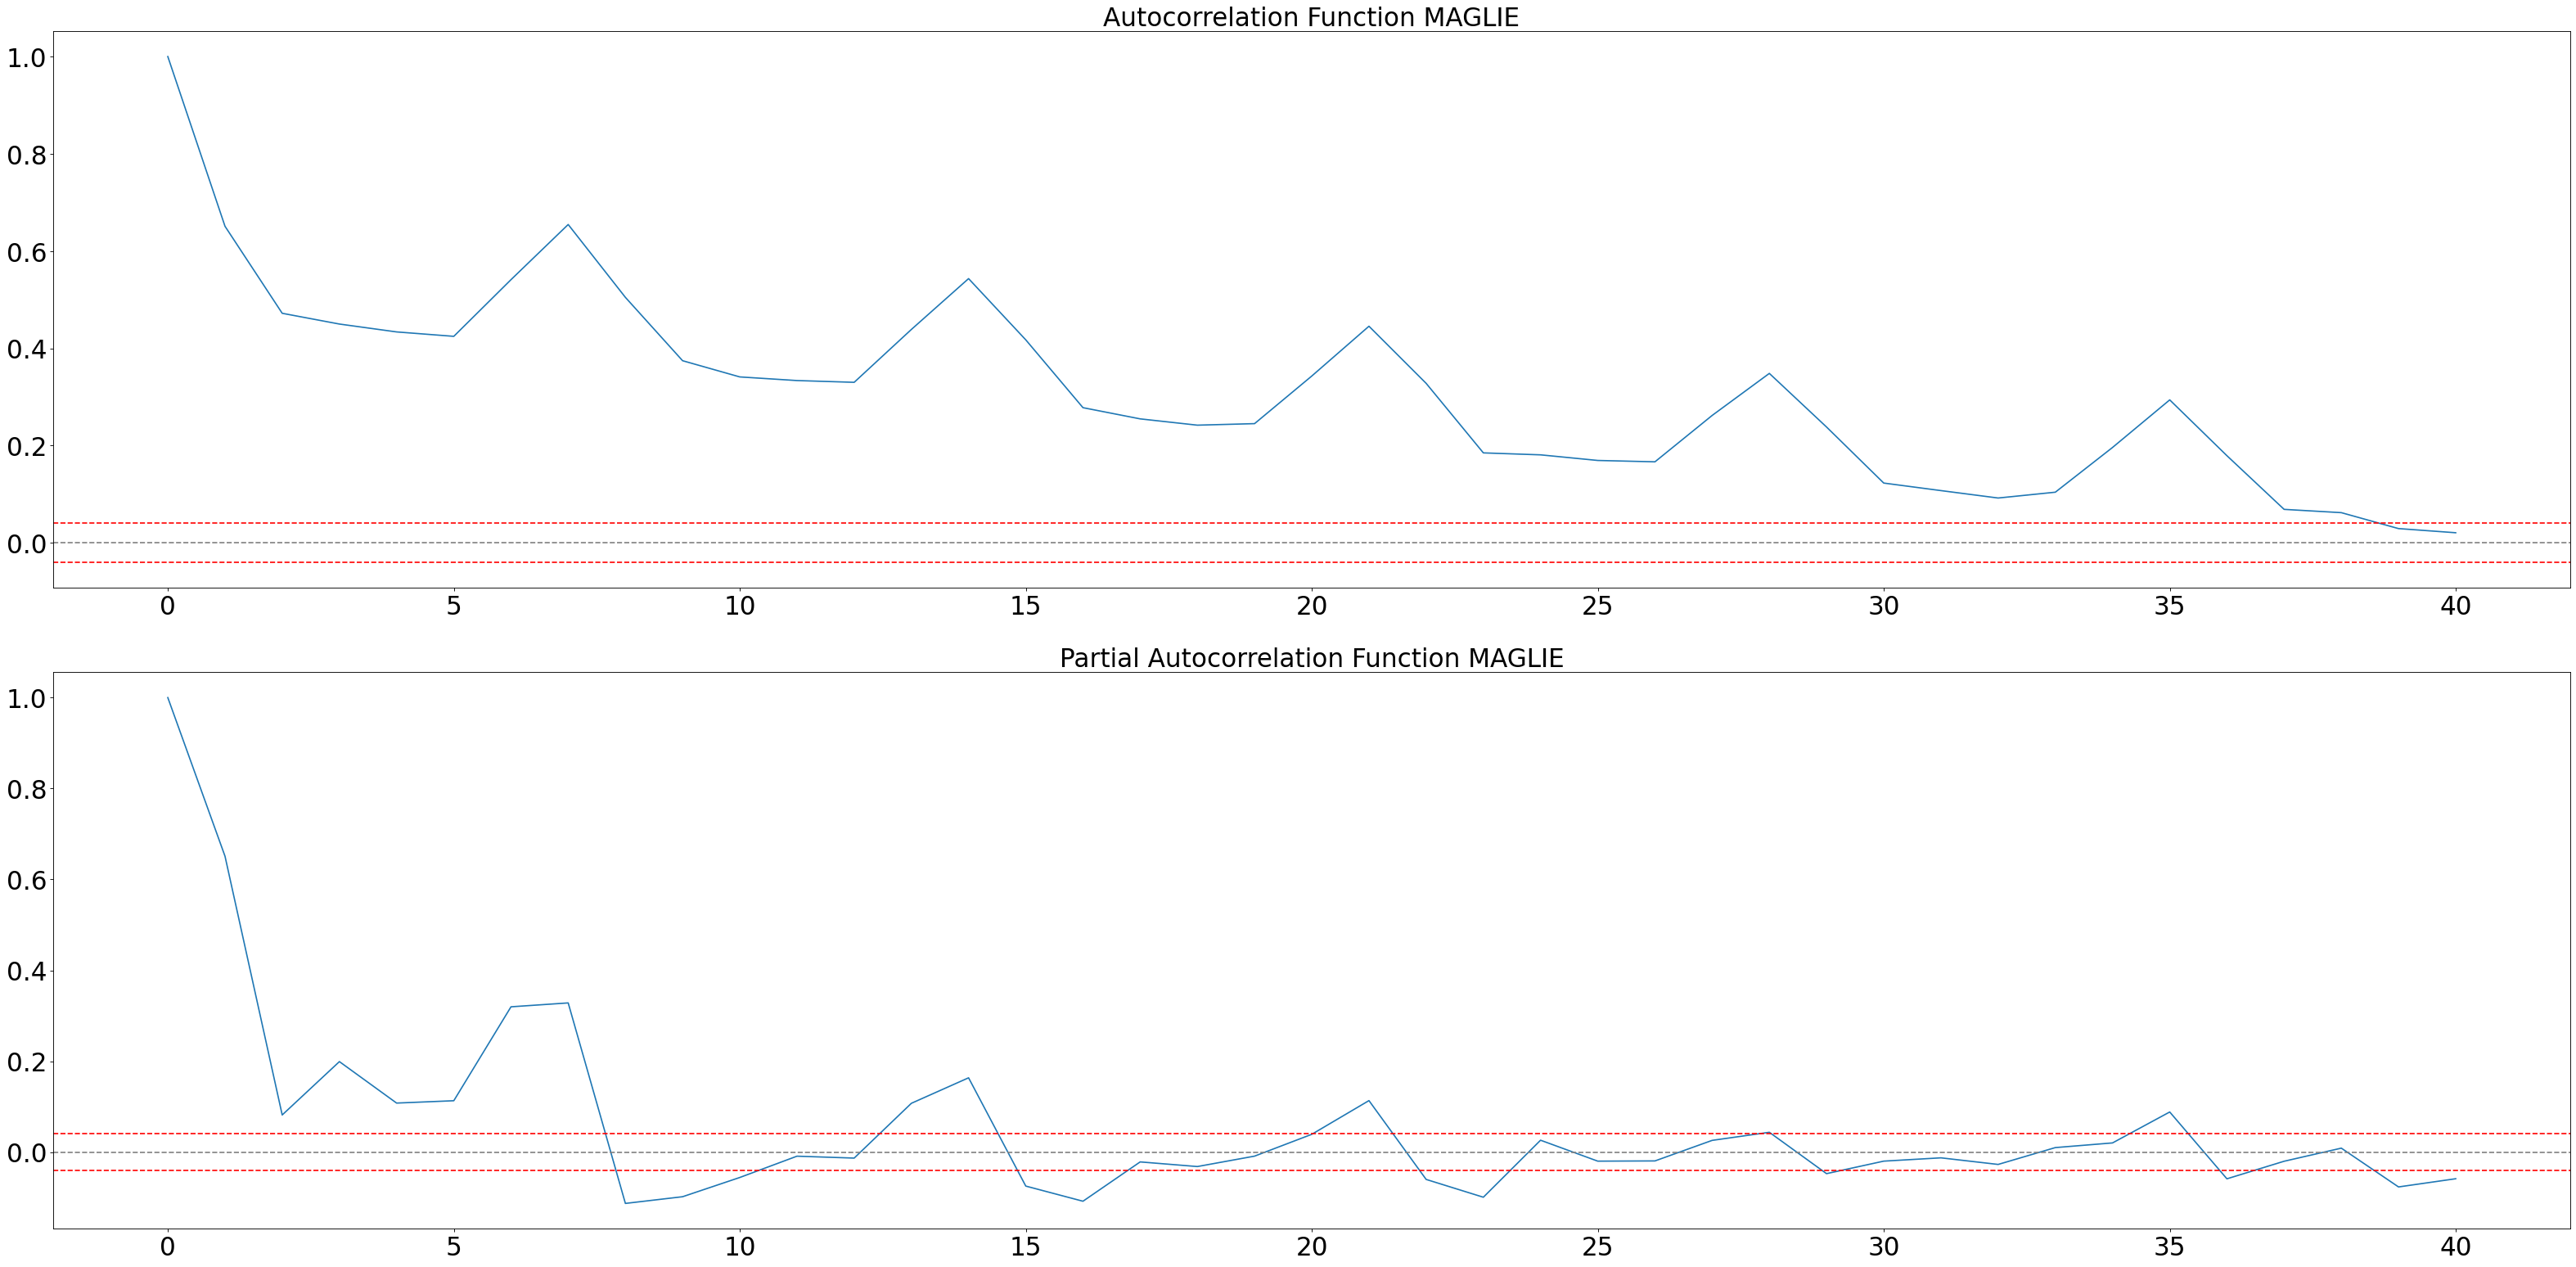

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:572: FutureWarning: fft=True will become the default in a future version of statsmodels. To suppress this warning, explicitly set fft=False.
  FutureWarning


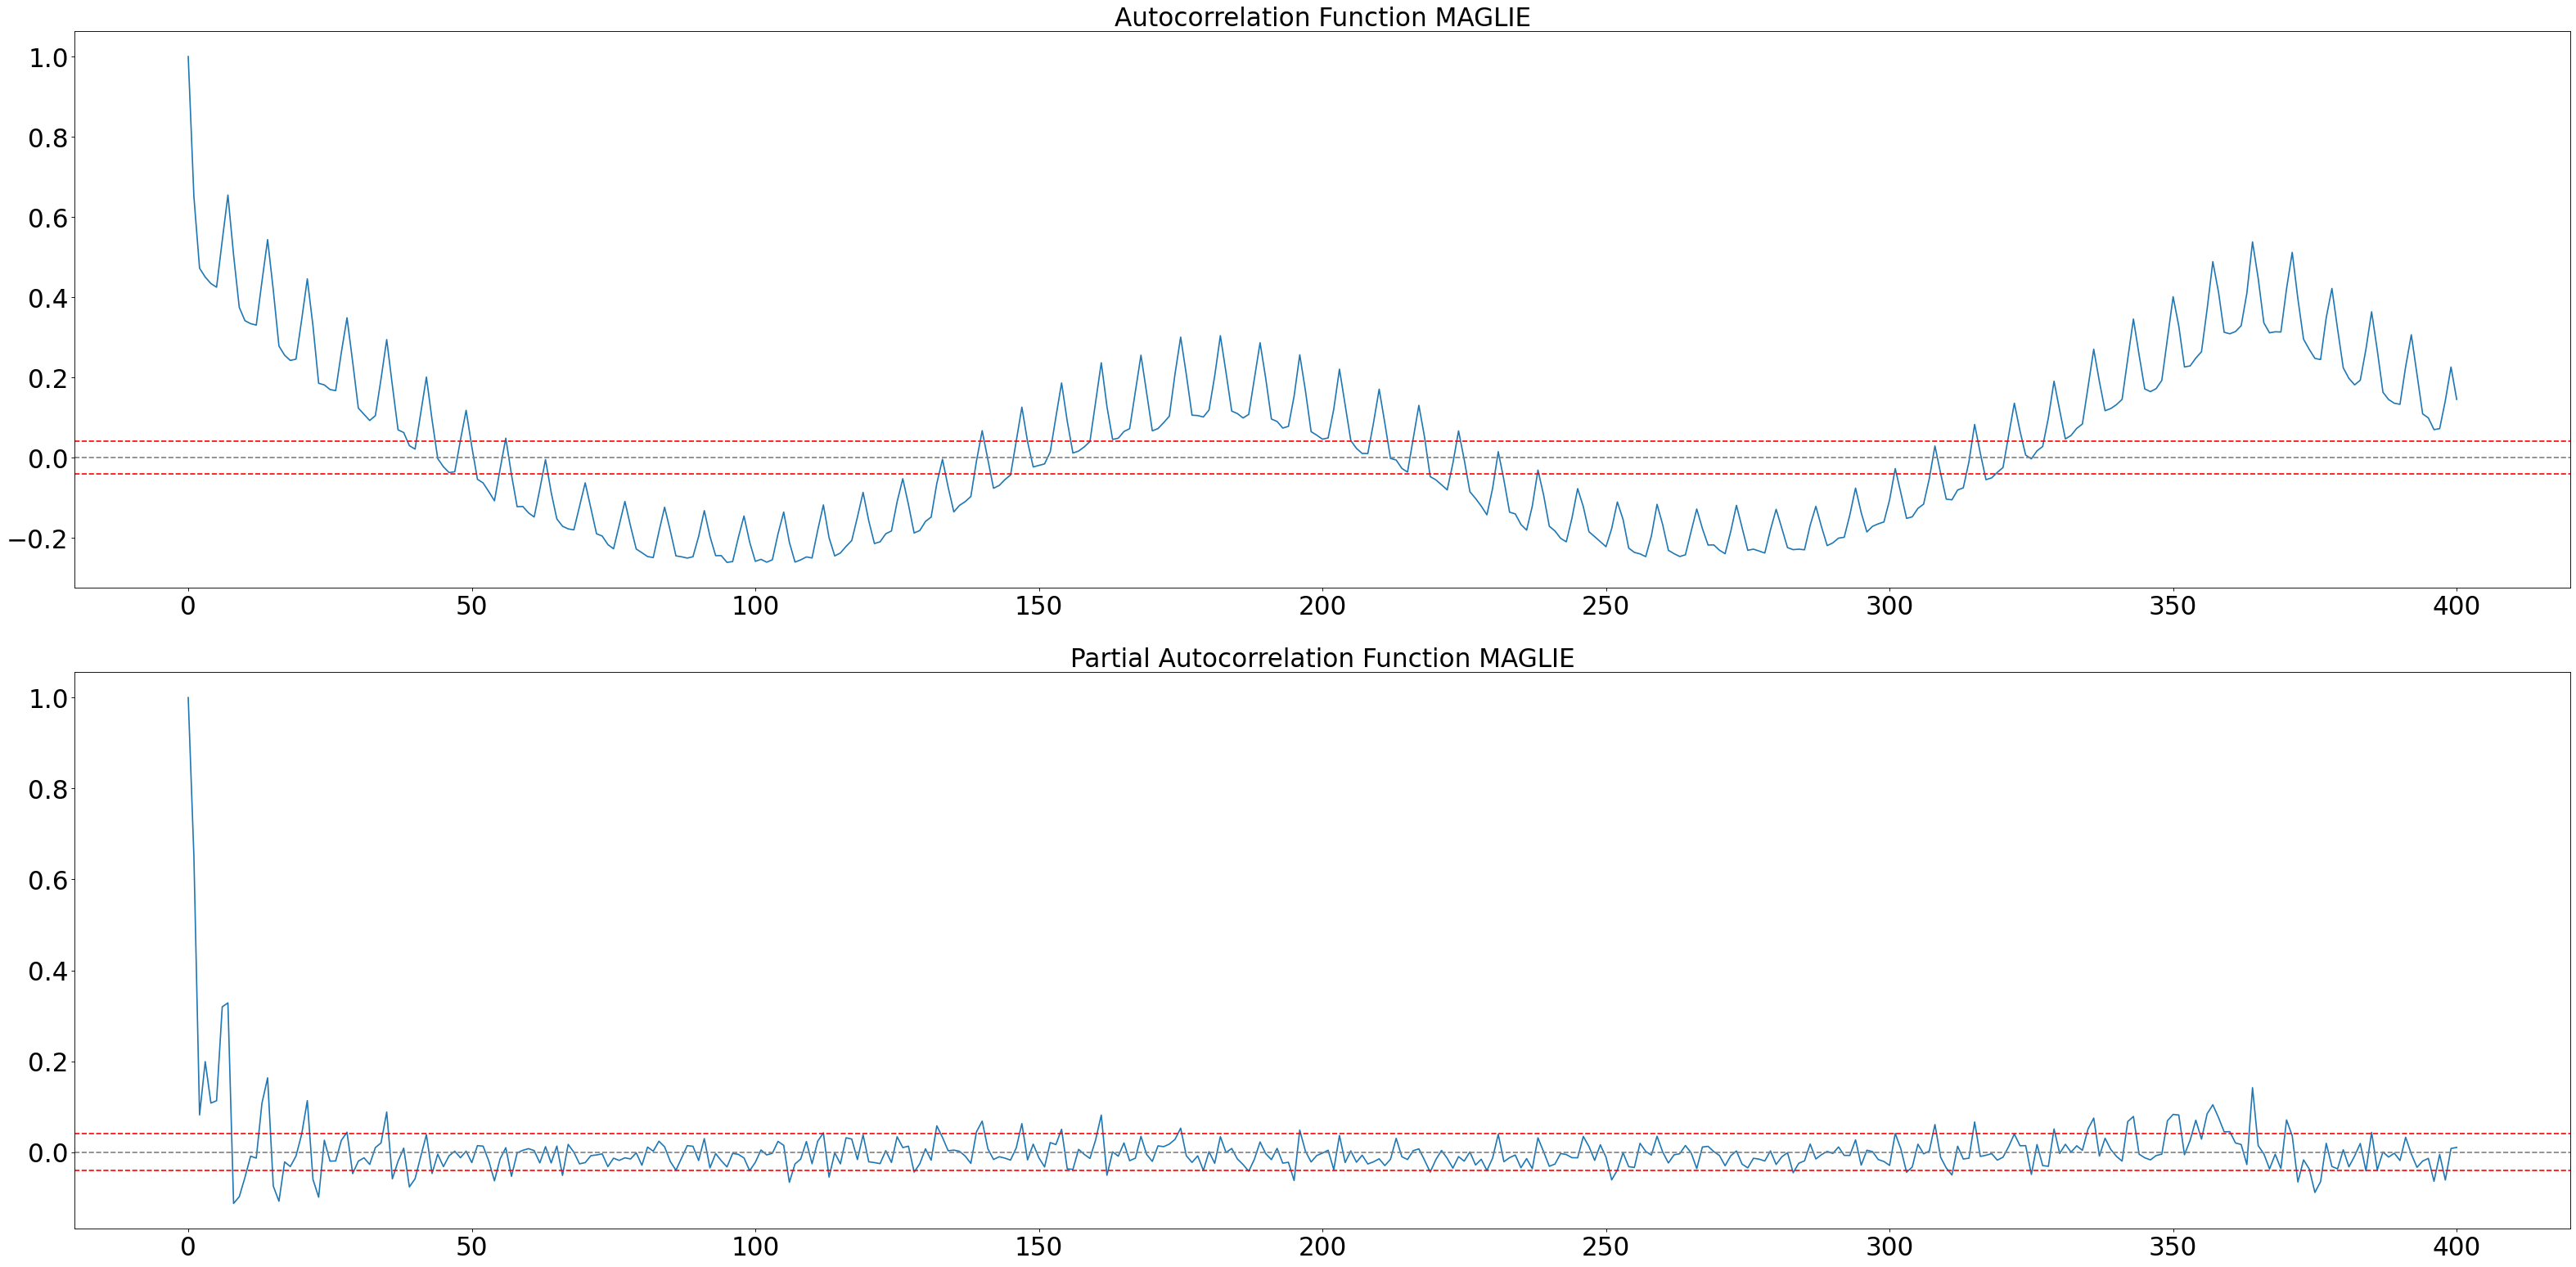

In [2]:
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller, acf, pacf
import numpy as np

# test Dickey-Fuller
print('Results of Dickey-Fuller Test for', ts.name, '\n')
dftest = adfuller(ts, autolag='AIC')
dfoutput = pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used'])
for key, value in dftest[4].items():
    dfoutput['Critical Value (%s)' % key] = value
print(dfoutput)

# decomposizione
decomposition = seasonal_decompose(ts, period=365)
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

# grafico della componente stagionale
plt.figure(figsize=(40, 20), dpi=80)
plt.title('Stagionalità ' + ts.name)
plt.plot(seasonal)    
plt.show()


def acf_pacf(timeseries, lags):
    """
    Realizza i grafici di autocorrelazione e autocorrelazione parziale

    Parameters
    ----------
    timeseries : Series
        la serie temporale.
    lags : int
        il numero di osservazioni desiderate.

    Returns
    -------
    None.

    """
    lag_acf = acf(timeseries, nlags=lags)
    lag_pacf = pacf(timeseries, nlags=lags, method='ols')
    plt.figure(figsize=(40, 20), dpi=80)
    
    # ACF
    plt.subplot(211)
    plt.plot(lag_acf)
    plt.axhline(y=0, linestyle='--', color='gray')
    plt.axhline(y=-1.96/np.sqrt(len(timeseries)), linestyle='--', color='red')
    plt.axhline(y=1.96/np.sqrt(len(timeseries)), linestyle='--', color='red')
    plt.title('Autocorrelation Function '+timeseries.name)
    
    # PACF
    plt.subplot(212)
    plt.plot(lag_pacf)
    plt.axhline(y=0, linestyle='--', color='gray')
    plt.axhline(y=-1.96/np.sqrt(len(timeseries)), linestyle='--', color='red')
    plt.axhline(y=1.96/np.sqrt(len(timeseries)), linestyle='--', color='red')
    plt.title('Partial Autocorrelation Function '+timeseries.name)
    plt.tight_layout()
    plt.show()


# grafici di autocorrelazione e autocorrelazione parziale (con finestre differenti)
acf_pacf(ts, 40)
acf_pacf(ts, 400)

### Applicazione del modello TBATS

*data contains daily observations. It exhibits weekly and yearly seasonal patterns. It means we are dealing with time series containing multiple seasonal effects. One of those seasonalities is long and contains 365 (366 for leap year) observations. This is something TBATS was designed for.*

Poi ho provato ad utilizzare il modello TBATS (preso dal seguente package: https://github.com/intive-DataScience/tbats) in quanto è in grado di gestire una stagionalità complessa. Per il nostro caso ho deciso di considerare: stagionalità settimanale, stagionalità annuale e, dopo varie prove, anche quella semestrale (perché mi fa ottenere MSE/MAE più bassi). Come prima, ho considerato un train-set che comprende l’80% dei valori osservati e ho calcolato l’accuratezza del modello selezionato facendo il forecasting (predizioni out-of-sample) sul test-set.

*In order to start forecasting we need to install tbats package and fit the model. The only thing that we have to manually provide to the model are season lengths:*

*You may have noticed that yearly season length is not an integer. It equals 365.25 to account for leap years, a feature TBATS is able to handle.
TBATS seems to have done a pretty good job in modeling both of seasonal effects:*

*If we take a look under the hood and review model parameters we will discover that 3 seasonal harmonics are used to model the weekly pattern and 11 harmonics are used to model the yearly pattern. TBATS has chosen to use Box-Cox transformation with lambda of 0.234955. Trend is not being modeled and ARMA is not used to model residuals as p, q are 0.*

---

Dalla sezione precedente si è visto che i dati contengono osservazioni giornaliere e che presentano periodi stagionali annuali, settimanali e semestrali. Questo significa che abbiamo a che fare con serie temporali aventi stagionalità multiple. In particolare, una di queste stagionalità risulta essere molto lunga in quanto contiene 365 osservazioni (366 negli anni bisestili). Si può quindi notare che la durata della stagione annuale non potrà essere rappresentata da un numero intero; e infatti essa sarà pari a $365.25$, proprio per tenere conto degli anni bisestili.

La possibilità di trattare stagionalità lunghe e di poter specificare periodi stagionali di lunghezza non intera sono caratteristiche per cui TBATS è stato progettato e che quindi è in grado di gestire. Per iniziare a fare previsioni si deve installare il pacchetto [tbats](https://github.com/intive-DataScience/tbats) e adattare il modello ai dati desiderati. L'unica cosa che si deve fornire manualmente sono le lunghezze dei periodi stagionali. Si è anche deciso di considerare un set di train comprendente l'80% dei valori osservati per calcolare l'accuratezza del modello confrontando le sue previsioni con il set di test.

---

TBATS sembra aver fatto un buon lavoro nel modellare gli effetti stagionali.
Se diamo uno sguardo ai parametri del modello, scopriamo che sono state usate *3 armoniche stagionali per modellare il modello settimanale e 11 armoniche per modellare il modello annuale. TBATS ha poi scelto di utilizzare la trasformazione Box-Cox con lambda di 0,234955. Il trend non viene modellato e ARMA non viene utilizzato per modellare i residui poiché p, q sono 0.*

In [ ]:
from tbats import TBATS


def tbats_model(timeseries, train_length, s, slow=True):
    """
    Previsioni con il modello TBATS

    Parameters
    ----------
    timeseries : Series
        la serie temporale.
    train_length : int
        la lunghezza del set di train (in rapporto alla serie completa).
    s : list
        l'array dei periodi stagionali.
    slow : bool
        se False velocizza il processo di scelta del modello finale (di default è True).

    Returns
    -------
    None.

    """
    # controllo se i dati sono settimanali o giornalieri
    if s.count(52) == 1:
        f = 'W-MON'
    else:
        f = 'D'
    
    # creo il set di train
    train = timeseries[pd.date_range(start=timeseries.index[0], end=timeseries.index[int(len(timeseries) * train_length)-1], freq=f)]

    # adatto il modello ai dati
    if slow:
        estimator_slow = TBATS(seasonal_periods=s)
        model = estimator_slow.fit(train)
    else:
        estimator = TBATS(
            seasonal_periods=s,
            use_arma_errors=False,  # shall try only models without ARMA
            use_box_cox=False       # will not use Box-Cox
        )
        model = estimator.fit(train)
    
    # stampo i parametri del modello
    print(model.summary())
    
    # predizioni in-sample (model.y_hat = train - model.resid)
    preds = model.y_hat
    tbats_dates = pd.date_range(start=timeseries.index[0], end=timeseries.index[len(train)-1], freq=f)
    tbats_ts = pd.Series(preds, index=tbats_dates)
    
    # predizioni out-of-sample
    fcast, conf_int = model.forecast(steps=len(timeseries)-len(train), confidence_level=0.95)
    fcast_dates = pd.date_range(start=timeseries.index[len(train)], periods=len(timeseries)-len(train), freq=f)
    ts_fcast = pd.Series(fcast, index=fcast_dates)
    ts_ci_min = pd.Series(conf_int['lower_bound'], index=fcast_dates)
    ts_ci_max = pd.Series(conf_int['upper_bound'], index=fcast_dates)
    
    # grafico del modello
    plt.figure(figsize=(40, 20), dpi=80)
    plt.title('Modello TBATS per {}'.format(timeseries.name))
    ax = train.plot(label='Train set', color='black')
    tbats_ts.plot(ax=ax, label='In-sample predictions', color='green')
    plt.legend()
    plt.show()
    
    # grafico delle previsioni
    plt.figure(figsize=(40, 20), dpi=80)
    plt.title('Forecasting con TBATS per {}'.format(timeseries.name))
    ax = timeseries.plot(label='Observed', color='black')
    ts_fcast.plot(ax=ax, label='Out-of-sample forecasts', alpha=.7, color='red')
    ax.fill_between(fcast_dates, ts_ci_min, ts_ci_max, color='k', alpha=.2)
    plt.legend()
    plt.show()
    
    # metriche di errore
    errore = ts_fcast - timeseries
    errore.dropna(inplace=True)
    print('MSE=%.4f'%(errore ** 2).mean())
    print('MAE=%.4f'%(abs(errore)).mean())


# modello TBATS con stagionalità settimanale, annuale e semestrale
tbats_model(ts, 0.8, [7, 365.25, 182.625], slow=False)